In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pint
import os
import pandas as pd;

In [3]:
unit = pint.UnitRegistry()

RAW Data

In [44]:

file_path1 = "DATA/Magnetic_Field_Inside_Solenoid_Table_3_12.csv"
file_path2 = "DATA/Magnetic_Field_Outside_Solenoid_Table_3_1.csv"

fig_path = "output_plots/"

if fig_path not in os.curdir:
    os.makedirs(fig_path)

inside_feild_data = pd.read_csv(file_path1)
outside_feild_data = pd.read_csv(file_path2)



# Display the data
print("(Table 3.12):")
print(inside_feild_data.head())

print("\n(Table 3.1):")

outside_feild_data["tan\\alpha"] = np.tan(np.radians(outside_feild_data["\\alpha"]))
B_y = 26 * unit.microtesla
B = lambda alpha: B_y * (np.tan(np.radians(alpha)) *unit.dimensionless)
outside_feild_data[ "B (\\muT)"] = B(outside_feild_data["\\alpha"])

print(outside_feild_data.head())


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'output_plots/'

In [5]:
inside_feild_data.to_csv(file_path1, index=False)  # Update the file (Table 3.12)
outside_feild_data.to_csv(file_path2, index=False)  # Update the file (Table 3.1)

print(outside_feild_data["B (\\muT)"][2])

12.681047302712397


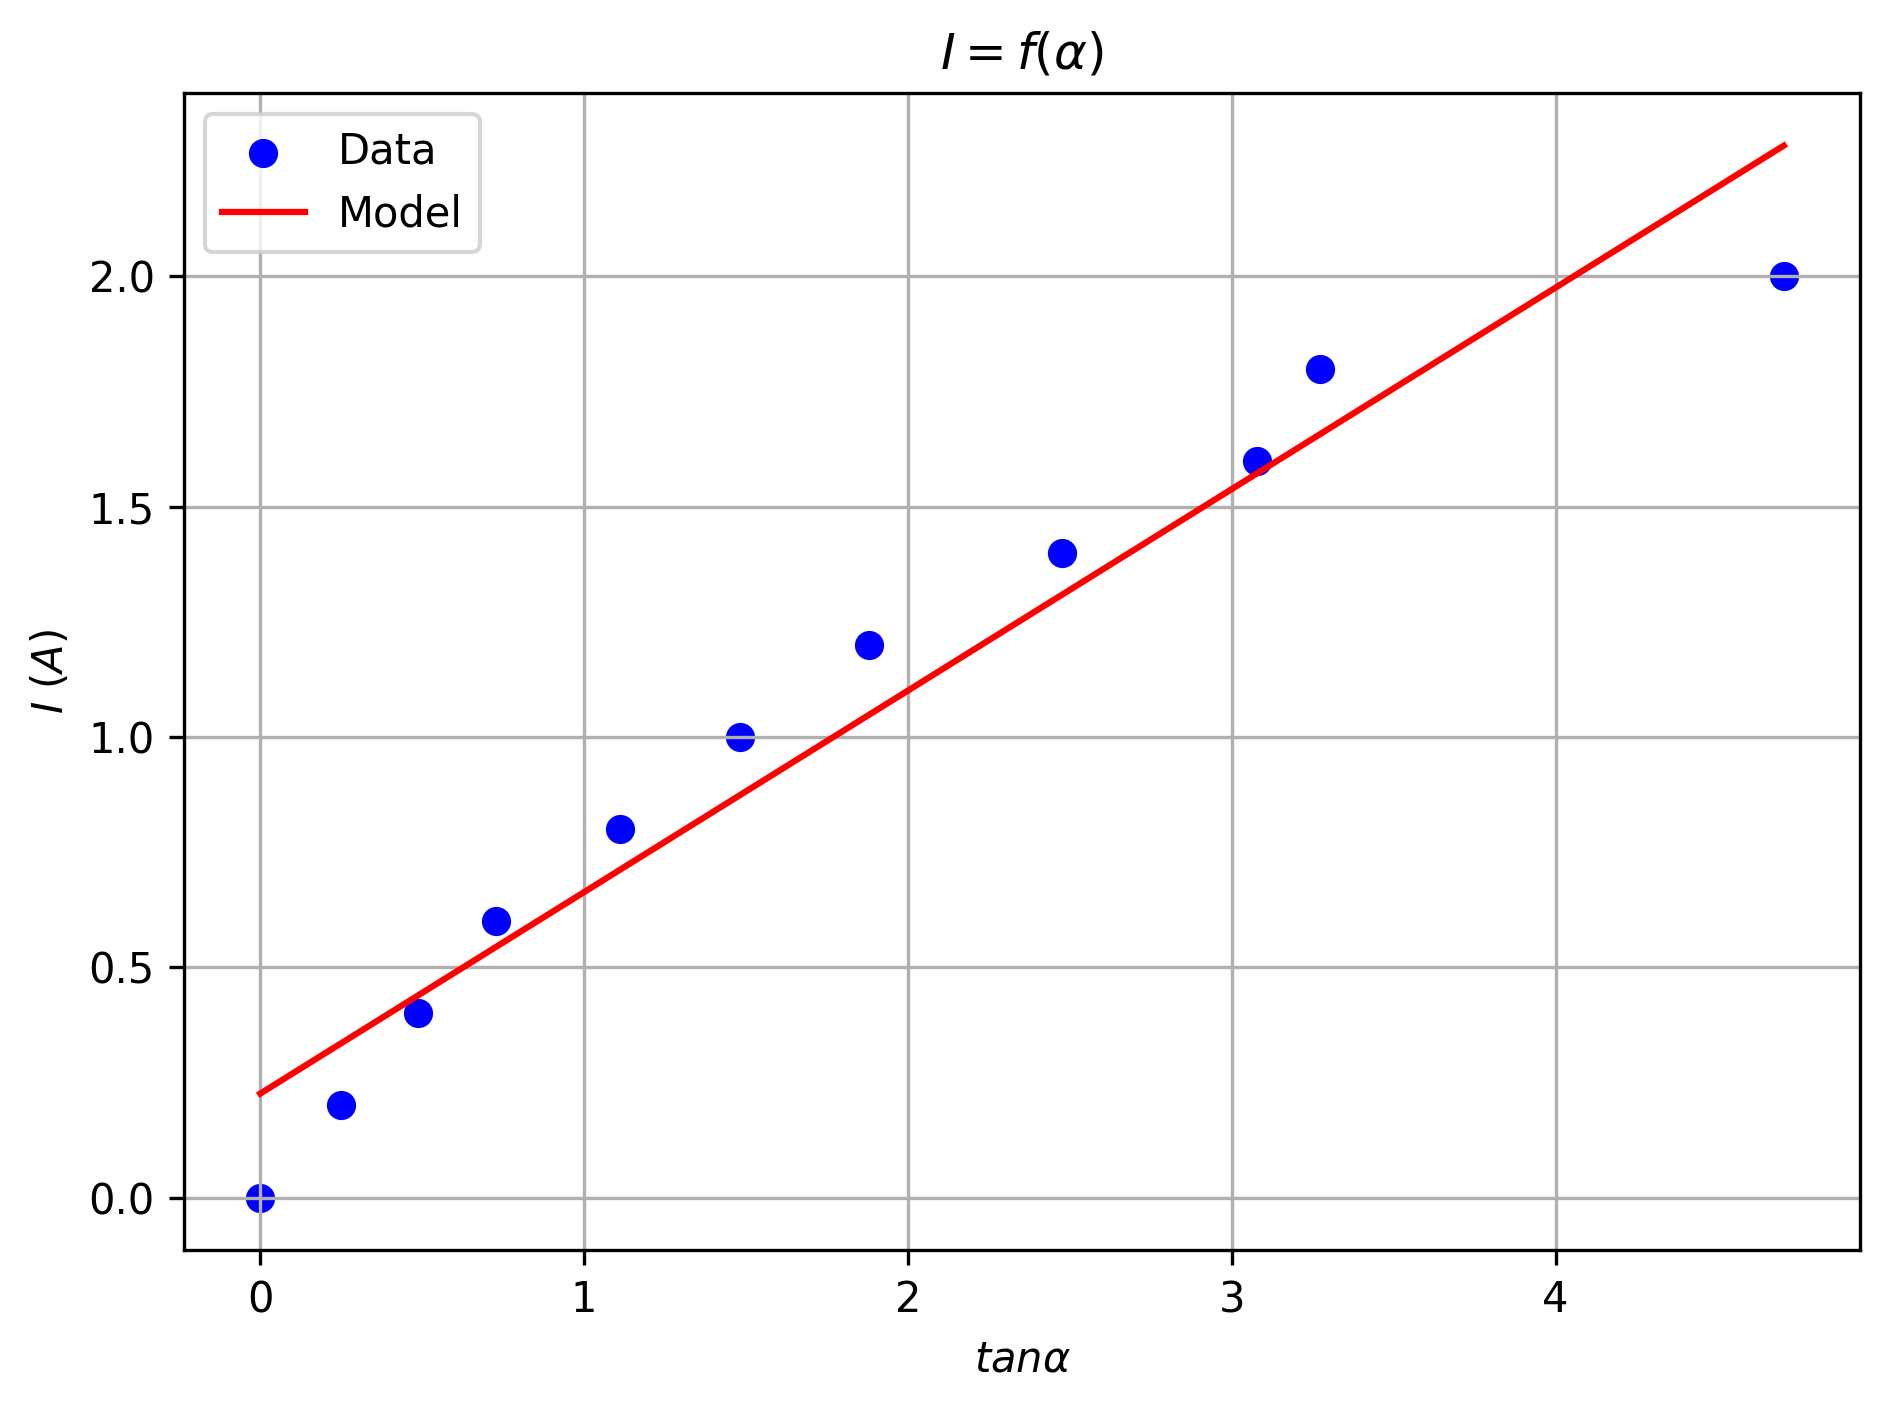

In [55]:
outside_ex_current = outside_feild_data["I (A)"].to_numpy()
outside_ex_tangante_alpha = outside_feild_data["tan\\alpha"].to_numpy()

model_outside = LinearRegression()
model_outside.fit(outside_ex_tangante_alpha.reshape(-1,1), outside_ex_current)
outside_line_space = np.linspace(min(outside_ex_tangante_alpha), max(outside_ex_tangante_alpha))
reg = model_outside.predict(outside_line_space.reshape(-1,1))

plt.figure(dpi=300)

plt.grid(True)
plt.scatter(outside_ex_tangante_alpha, outside_ex_current,c ="b", label="Data")
plt.plot(outside_line_space, reg, c="r", label="Model")

plt.ylabel("$I$ $(A)$")
plt.xlabel("$tan\\alpha$")
plt.title("$I = f(\\alpha)$")
plt.tight_layout()
plt.legend()

plt.savefig(fig_path+"current_vs_tan_alpha.jpg")
plt.show()